In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the data

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Shape 

print("Train")
print("X :", x_train.shape,end=" ")
print("Y :", y_train.shape)
print("Test")
print("X :", x_test.shape,end=" ")
print("Y :", y_test.shape)

Train
X : (50000, 32, 32, 3) Y : (50000, 1)
Test
X : (10000, 32, 32, 3) Y : (10000, 1)


In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

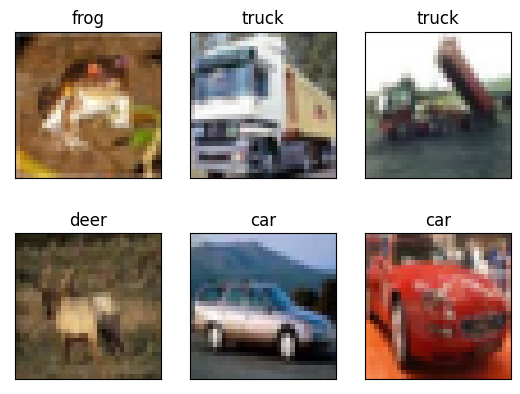

In [5]:
# Training Image 

for i in range(6):
    plt.subplot(231+i)
    fig = plt.imshow(x_train[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(classes[y_train[i][0]])
plt.show()

In [6]:
# Normalization and One-hot encoding 

x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
# Model Building 

model = keras.Sequential(
        [
            keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding="same",activation="relu",input_shape=(32,32,3)),
            keras.layers.MaxPooling2D((2,2)),
            keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding="same",activation="relu"),
            keras.layers.MaxPooling2D((2,2)),
            keras.layers.Conv2D(filters=128,kernel_size=(5,5),padding="same",activation="relu"),
            keras.layers.MaxPooling2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(512,activation="relu"),
            keras.layers.Dense(128,activation="relu"),
            keras.layers.Dense(10,activation="softmax")
        ])

In [8]:
# Compile Model

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["acc"])

In [9]:
# Train Model

model_history = model.fit(x_train,y_train,epochs=5, batch_size=4, validation_data=(x_test,y_test))

Epoch 1/5
12500/12500 [==============================] - 197s 16ms/step - loss: 1.5617 - acc: 0.4326 - val_loss: 1.3768 - val_acc: 0.5051
Epoch 2/5
12500/12500 [==============================] - 195s 16ms/step - loss: 1.1243 - acc: 0.6006 - val_loss: 1.0227 - val_acc: 0.6415
Epoch 3/5
12500/12500 [==============================] - 196s 16ms/step - loss: 0.8999 - acc: 0.6854 - val_loss: 0.9177 - val_acc: 0.6778
Epoch 4/5
12500/12500 [==============================] - 195s 16ms/step - loss: 0.7396 - acc: 0.7409 - val_loss: 0.8970 - val_acc: 0.6903
Epoch 5/5
12500/12500 [==============================] - 187s 15ms/step - loss: 0.6105 - acc: 0.7861 - val_loss: 0.8811 - val_acc: 0.7087


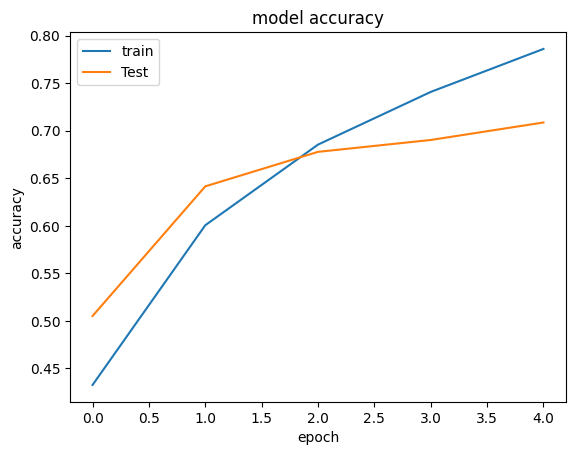

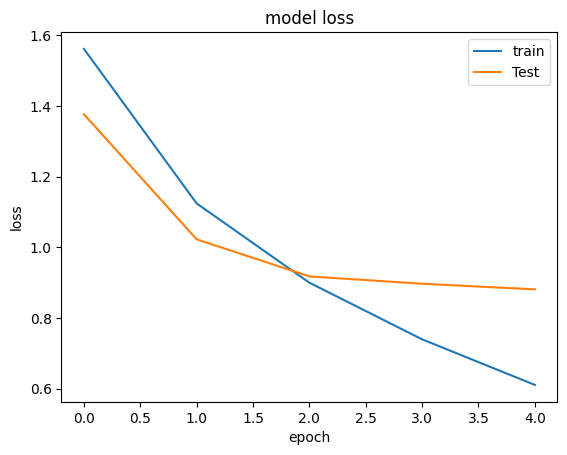

In [10]:
# Model Performance Chart

plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])

plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","Test"])
plt.show()

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","Test"])
plt.show()

In [11]:
# Save the model

model.save("CIFAR10.h5")

In [12]:
# Load the model

model = keras.models.load_model("CIFAR10.h5")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [14]:
# Accuracy

_, accuracy = model.evaluate(x_test,y_test,verbose=0)
print("Accuracy :", accuracy)

Accuracy : 0.7087000012397766


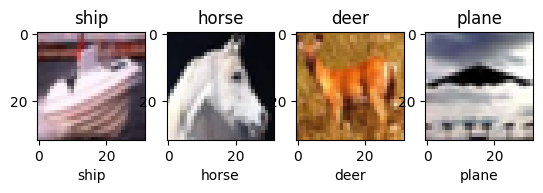

In [15]:
# Test Image 
import random
k = random.randint(0,1000)

for i in range(4):
    plt.subplot(141+i)
    fig = plt.imshow(x_test[k+i])
    out = model.predict(x_test[k+i].reshape(1,32,32,3),verbose=0)
    plt.title(classes[np.argmax(y_test[k+i])])
    plt.xlabel(classes[np.argmax(out)])